<a href="https://colab.research.google.com/github/cognitivezillion/AI-101/blob/main/Project-01/AI_101_01_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-101 Project-01📚
## Building a simple AI Model for Digit Recognition
*(Learning Time: Theory: 5 mins + Practical : 10 mins)*

The task of classifying handwritten digits using the MNIST dataset is a fundamental introduction to machine learning and image classification. The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). Each image is labeled with the corresponding digit it represents.

## Requirement Components 📓⏭

What do each of these mean? Refer the Theory Overview and Guide here: https://github.com/cognitivezillion

1. **Environment:** (💻) In this case, we will use the Google Colab to build this simple project.

2. **Dataset:**(ℹ) We will use the dataset popularly called MNIST. MNIST Handwritten dataset contains a collection of 28x28 pixel grayscale images of handwritten digits along with their corresponding labels (digits 0 through 9).

Example Image:
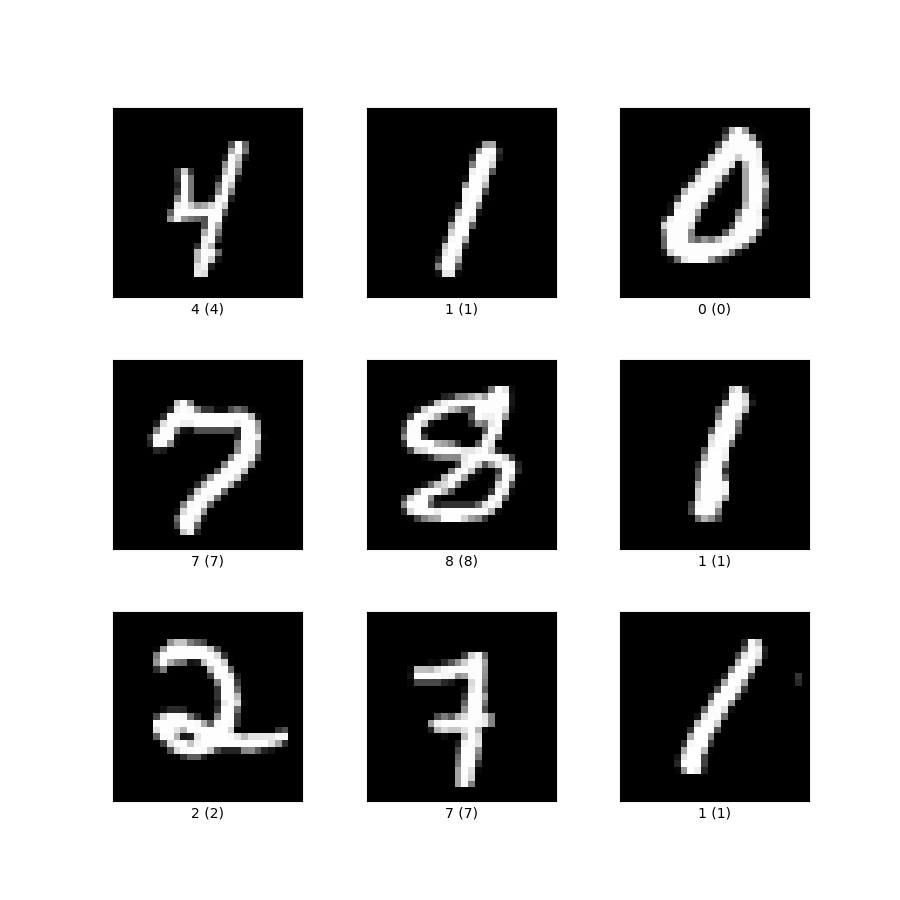




3. **Libraries:** (⚙) We will use some common ML and AI Libraries that are avaialble for free.

For Example:
*   numpy
*   matplotlib
*   scikit-learn

We will a few functions from these libraries, we will learn as we go.



# That is all we need!🙂 Let us get started ▶

## Let us import the necessary libraries and Data:
(Hint: To run the cell, press the Run (▶) or press CTRL + ENTER )

Import might take a few minutes ...

In [ ]:
# Data related imports
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# ML / AI Specific Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers , Sequential

# Imports for Visualizations
import matplotlib.pyplot as plt

# Other Util Imports
import random
import json
import time


In [ ]:
# Load the Dataset
# The load_data function loads the data that is present as part of tensorflow dataset

# The data is received as Train and Test data

(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Split the data

# The data was already split into Train and Test Data.
# Train Data is used to Train and Test data is used to test the models respectively.

# We will further split the train data into Train and Validation data.
# We will use the validation data to help the model training

# We will use the function train_test_split which is available as part of the sklearn library

X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, stratify = y_train, test_size = 0.1, random_state = 42)

In [ ]:
# Let us check the how many datasamples are present in each of the subset using the "print" command

print("shape of x_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)

print()
print("shape of x_val: ", X_val.shape)
print("shape of y_val: ", y_val.shape)

print()
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)


shape of x_train:  (54000, 28, 28)
shape of y_train:  (54000,)

shape of x_val:  (6000, 28, 28)
shape of y_val:  (6000,)

shape of x_test:  (10000, 28, 28)
shape of y_test:  (10000,)


## Awesome!✨

At this point, we have successfully loaded the data.
We have loaded a total of 60,000 hand-written digits and their labels.

Let us visualize some samples to understand them.

We will now use the visualization library "matplotlib"

## GAME ⚽: You can change the value of 'i' below to view different images.

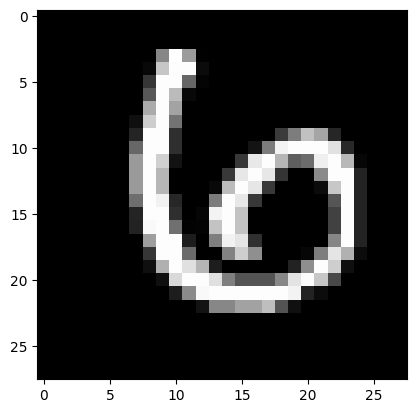

In [ ]:
# Plot the i-th image in the dataset X_train
# The cmap argument in the imshow function can be modified to change the color scheme of the image

i = 50

plt.imshow(X_train[i], cmap='gray')

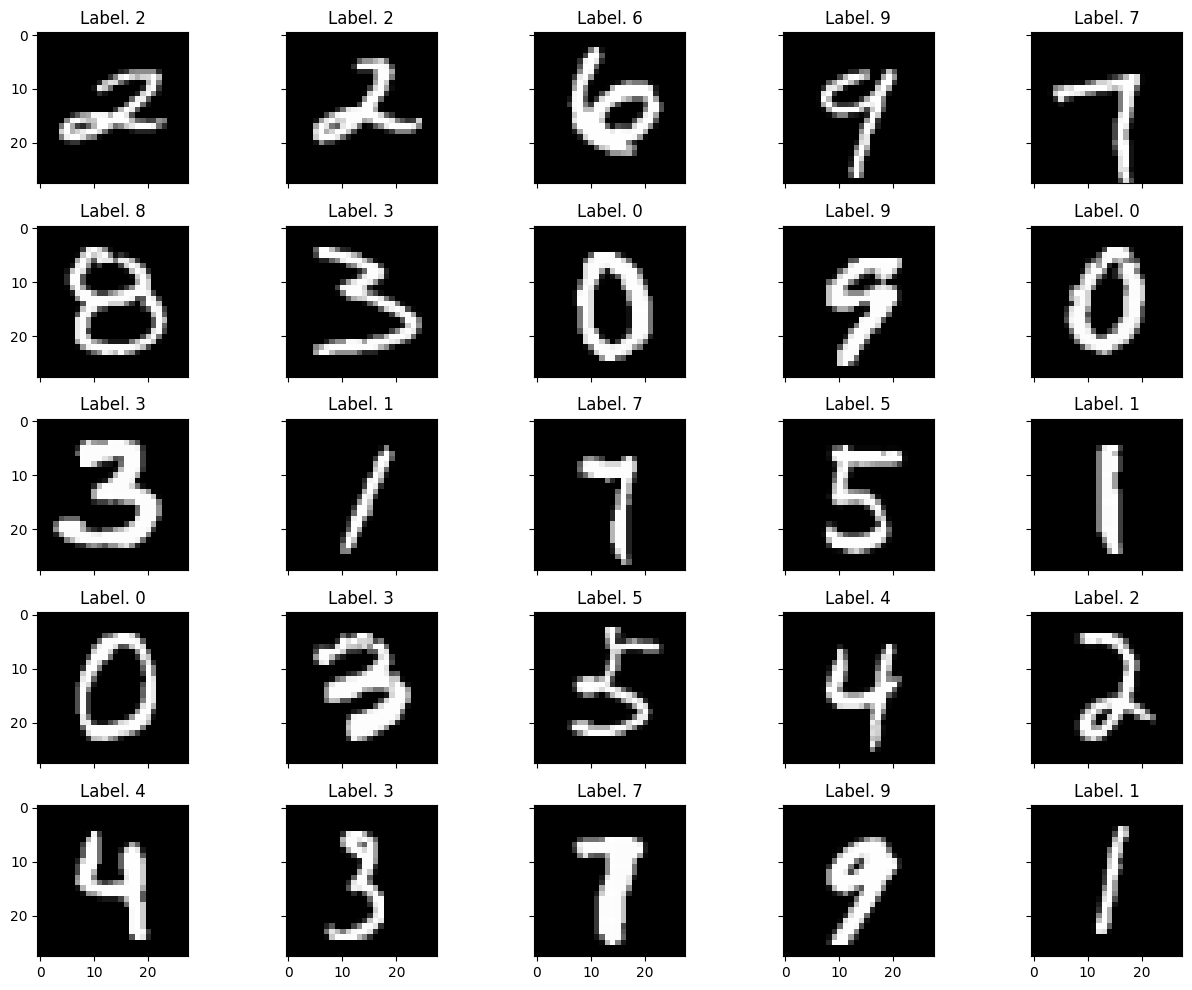

In [ ]:
# Visualize a set of Random Images from the Dataset now; Together with their labels

lines=5

random_indices=random.sample(range(X_train.shape[0]),lines*lines)
sample_images=X_train[random_indices,:]
sample_labels=y_train[random_indices]

fig,axs=plt.subplots(nrows=lines,ncols=lines,figsize=(13,10),sharex=True,sharey=True)
for i in range(lines *lines):
    subplot_row=i // lines
    subplot_col=i % lines
    axs[subplot_row,subplot_col].imshow(sample_images[i,:], cmap = 'gray')
    axs[subplot_row,subplot_col].set_title("Label. %d" % sample_labels[i])
plt.tight_layout()

In [ ]:
# Now that we have understood the dataset, let us setup some configurations using this info

# channel = 1 for gray scale Images
image_rows,image_colums,channel=28,28,1

# classes: From class-0 to class-9
num_classes=10

# Input shape of the image is of the format: (Length X Width X Channels)
input_shape=(image_rows,image_colums,channel)

In [ ]:
# Data Normalization

# Each pixel of the image is represented by a value from 0 to 255;
# where 0 indicates black and 255 indicates White.

# let us normalize the data to set the pixel intensities between 0 to 1

X_train = X_train.reshape(-1,*input_shape)/255.0
X_val =  X_val.reshape(-1,*input_shape)/255.0
X_test =  X_test.reshape(-1,*input_shape)/255.0

In [ ]:
# One Hot Encoding

# This step will convert the class labels to one hot encoding, which is necessary for the upcoming training pipeline
# For Example:

# Class-0 will have an one-hot encoding where the first digit is '1' ==> " 1 0 0 0 0 0 0 0 0 0"
# Class-5 Similarly                                                 ==> " 0 0 0 0 0 1 0 0 0 0 "

y_train = keras.utils.to_categorical (y_train, num_classes)
y_test = keras.utils.to_categorical (y_test, num_classes)


# Model Training 🏃

Let us get now build a simple AI Model Architecture and use the above data to train the model.


We will use Convolution, MaxPooling, DropOut, Flatten and Dense Layers
To get more information on the AI Model Layers refer:

GITHUB: https://github.com/cognitivezillion or
YOUTUBE CHANNEL: https://www.youtube.com/@cognitivezillion

In [ ]:
# Let us create a simple AI Model using the some predefined AI Layers



model = Sequential([
    layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.15),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(strides=(2,2)),
    layers.Dropout(0.15),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])



# Compile model
# The optimizer, Learning Rate and Loss functions are some of the important parameters for model training

model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                        

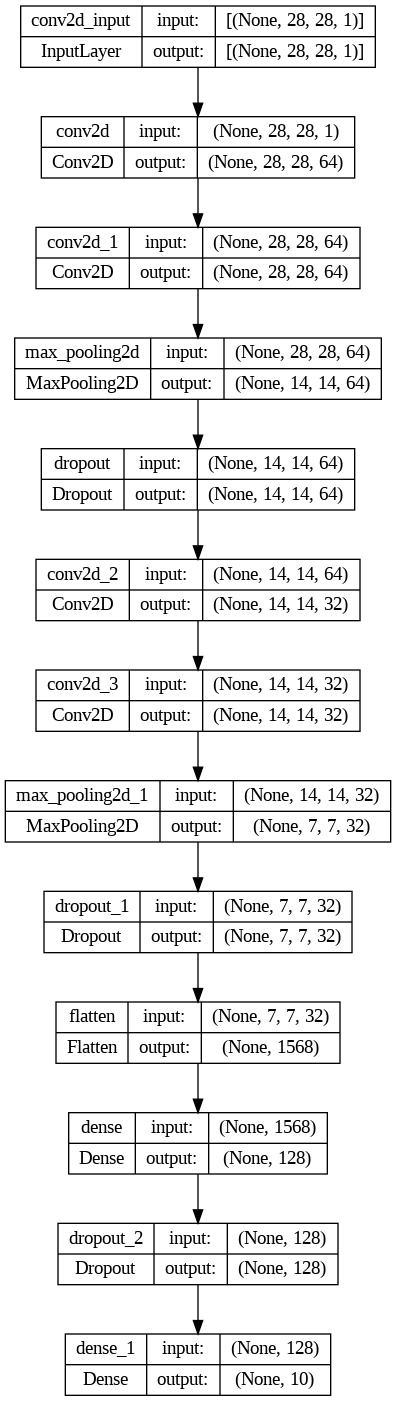

In [ ]:
# Let us visualize the model now
model.summary()


tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
# Let us train the model above with the dataset that we have loaded
# Observe the loss and accuracy as the model trains


# HINT: ETA shows how many minutes the model takes to train
# To improve the speed, enable "T4 GPU" in the Runtime settings above


history = model.fit (X_train, y_train, validation_data = (X_test, y_test),epochs = 3, batch_size=64, verbose = 1)

Epoch 1/3
844/844 [==============================] - 25s 16ms/step - loss: 0.2406 - accuracy: 0.9230 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 2/3
844/844 [==============================] - 11s 13ms/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 0.0446 - val_accuracy: 0.9859
Epoch 3/3
844/844 [==============================] - 11s 13ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9893


In [ ]:
# Now that the model has trained, let us see how it performs with the Test data that we have set aside.

# Accuracy is used to see the performance of the model
# We should read this in %. For Example: Accuracy of 0.90 means 90% Accuracy

loss,accuracy=model.evaluate (X_test, y_test)
print("* Loss: {} \n* Accuracy: {}".format(loss,accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9893
* Loss: 0.03419262170791626 
* Accuracy: 0.989300012588501


The model has now trained with very high accuracy⭐

We had train the model for 3 Epochs

ONE EPOCH = The model has seen the data once 👀

So the Model has read through the Train data set 3 Times. With only 3-Epochs we get a very good accuracy✅

We had recorded the model training process using the "history" variable. Let us see the recorded variable now.

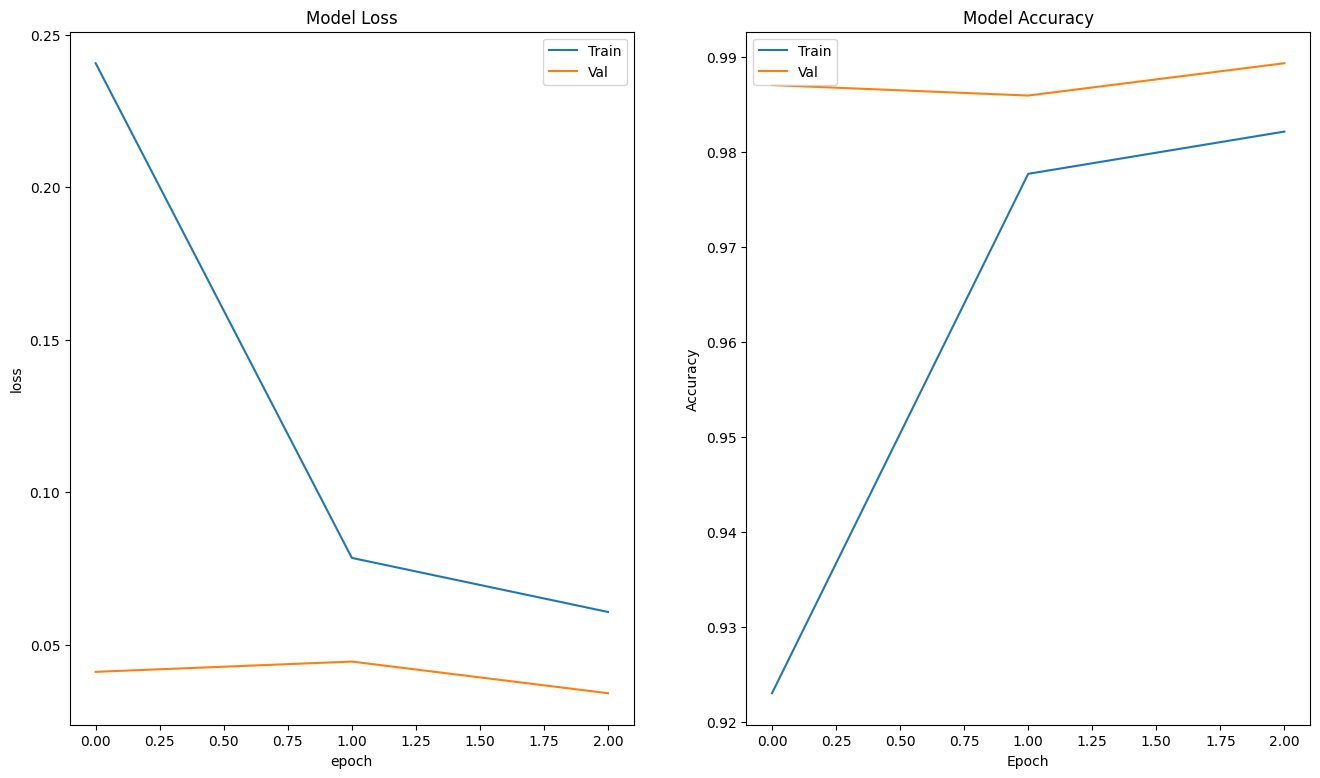

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].legend(['Train', 'Val'], loc = 'best')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc = 'best')

plt.show()

# Congratulations! You have now sucessfully trained your first AI Model from scratch. ✨

Now save the notebook and show off your first project on LinkedIn and other social media.
Dont forget to tag - Cognitive Zillion for this free course!😉

For more projects, Follow:


*   GITHUB: https://github.com/cognitivezillion (star ⭐ the Repo for new updates)
*   YOUTUBE: ▶ youtube.com/@cognitivezillion
*   INSTAGRAM: 📱 https://instagram.com/cognitivezillion?igshid=OGQ5ZDc2ODk2ZA%3D%3D&utm_source=qr

